In [1]:
import cv2
import numpy as np
from importnb import Notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy.fft as fft
import numpy.matlib
from skimage.transform import rotate

In [2]:
with Notebook(): 
        import utils
        import pinkNoise

In [3]:
def blurLegend(directions, magnitude):
    norm = mpl.colors.Normalize(0, np.pi)
    plt.imshow(norm(magnitude))
    plt.show()

In [4]:
def rotateMatrix(matrix, angle):
#     mat_center = tuple(np.array(matrix.shape[1::-1]) / 2)
#     rot_mat = cv2.getRotationMatrix2D(mat_center, angle, 1.0)
#     return cv2.warpAffine(matrix, rot_mat, matrix.shape[1::-1], flags=cv2.INTER_LINEAR)
    return rotate(matrix, angle)

In [6]:
def MSELoss(img1, img2):
    return np.sum(np.power(img1 - img2, 2))

In [7]:
def linearBlur(img, r, theta):
    kernel = blurKernel(r, theta)
    return cv2.filter2D(np.uint8(img), -1, kernel)

In [8]:
def findKernel(img, r_min=10, r_max=30, inc_ang=5):
    mse = float('inf')
    opt_r, opt_theta = 1, 0
    for r in range(r_min, r_max):
        for theta in range(0, 180, inc_ang):
            blur = linearBlur(img, r, theta)
            err = MSELoss(img, blur)
#             print(r, theta, err, end = '\r')
            if err < mse:
                mse = err
                opt_r, opt_theta = r, theta
    return opt_r, opt_theta

In [9]:
def getImageBlur(img, patch_size = 30):
    blurField = np.zeros(img.shape)
    magnitude = np.zeros(img.shape)
    pd = patch_size // 2
    img = np.pad(img, ((pd, pd), (pd, pd)), 'reflect')
    for i in range(pd, img.shape[0]-pd):
        for j in range(pd, img.shape[1]-pd):
            print(i, j, end = '\r')
            magnitude[i-pd,j-pd], blurField[i-pd,j-pd] = findKernel(img[i-pd:i+pd,j-pd:j+pd], 25, 31, 10)
#             magnitude[i][j], blurField[i,j] = findKernel(img[i:i+30,j:j+30], 25, 31, 10)
    return magnitude, blurField

In [10]:
def patches(img):
    rows = img.shape[0]
    cols = img.shape[1]
    patch_size = 30

    for i in range(0, rows, patch_size):
        ex = min(i + patch_size, rows)
        for j in range(img.shape[1]):
            ey = min(j + patch_size, cols)
            print(i,j)
            print(findKernel(img[i:ex, j:ey]))
            

image ./resources/test4.jpg loaded
[[0.         0.09763107 0.19526215]
 [0.09763107 0.33333333 0.09763107]
 [0.19526215 0.09763107 0.        ]]


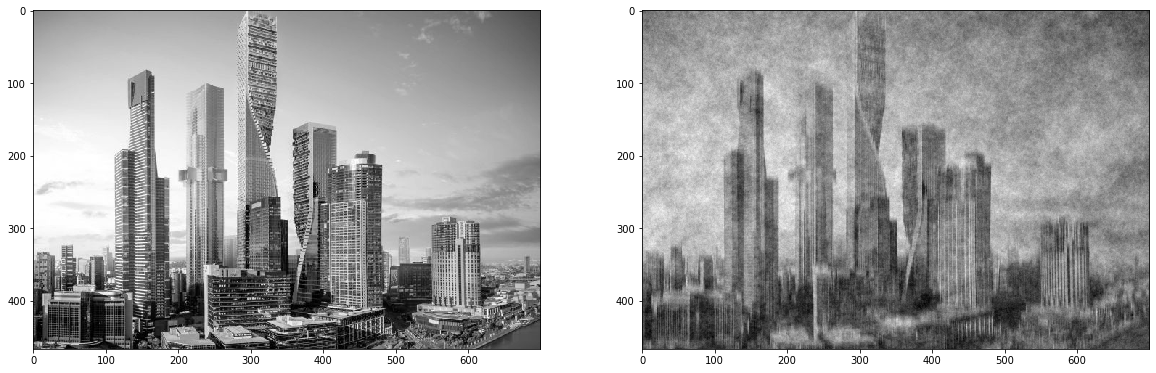

In [11]:
# img = utils.loadImage('./resources/blu.png', 'gray')
img = utils.loadImage('./resources/test4.jpg', 'gray')
k = blurKernel(3, 45)
print(k)
blurred_img = linearBlur(img, 10, 90)
blurred_img_noise = pinkNoise.addNoise(blurred_img, -1)
_, plots = plt.subplots(1,2,figsize=(20,20))
plots[0].imshow(img, cmap = 'gray')
plots[1].imshow(blurred_img_noise, cmap = 'gray')
plt.show()
magnitude, directions = getImageBlur(blurred_img_noise[150:200,150:200])
# print(findKernel(blurred_img_noise[40:80,40:80], 15, 5))
# plt.imshow(ret, cmap = 'gray')
